# Revisão de código 

Olá! 

Meu nome é Suelen. Estou feliz em revisar seu projeto hoje!

Quando vejo um erro pela primeira vez, apenas aponto. Deixarei você encontrá-lo e corrigi-lo sozinho. Além disso, ao longo do texto, farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Mas se você ainda não consegue lidar com essa tarefa, darei uma dica mais precisa na próxima iteração e também alguns exemplos práticos. Estarei aberta a feedbacks e discussões sobre o tema.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como estas:


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Sucesso. Tudo está correto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

O bloco requer algumas correções. O trabalho não pode ser aceito com os comentários vermelhos.
</div>

Você pode me responder usando isto:

<div class="alert alert-block alert-info">
<b>Resposta do aluno</b> <a class="tocSkip"></a>
</div>



<div class="alert alert-block alert-success">
<b>Comentário geral: </b> <a class="tocSkip"></a>

Parabéns pela conclusão do projeto, Aline!👏🚀

O seu trabalho demonstra alta qualidade, com código bem estruturado e comentários relevantes em cada etapa. Vi seu comentário no final do projeto onde você solicitou dicas de otimizar o código. Então adicionei apenas algumas sugestões que podem contribuir para elevar ainda mais a qualidade do projeto.

O projeto está aprovado! Continue com o excelente trabalho!

</div>

# Sprint 6 - Projeto Integrado 1 

## Abrir o arquivo de dados e estudar as informações gerais

In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

# Ler dataframe
df = pd.read_csv('/datasets/games.csv')

# Obter uma visão geral dos dados
print(df.head(10))
df.info()

                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77     

## Preparar os dados

### Formatar títulos das colunas para que fiquem com as letras minúsculas

In [2]:
df.columns = (
 df.columns
 .str
 .lower()
)

print (df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### Alterar tipos dos dados armazenados na coluna 'year_of_release' para inteiro 

In [3]:
# Como existem valores vazios na coluna e o tipo de dados de números inteiros não aceita valores vazios na 
# coluna, e como as análises de vendas serão feitas com base nos anos, as linhas são excluídas do dataframe.
df = df.dropna(subset=['year_of_release'])

# Então, os valores são convertidos de float para int.
df['year_of_release'] = (
  df['year_of_release']
  .astype(int)
)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Sugestão: É possível preencher os dados nulos da coluna `Year_of_Release` da seguinte maneira:
```python 

# Preenchendo valores vazios da coluna 'Year_of_Release'

#Remover os jogos sem nome
df_games.dropna(subset=['Name'], inplace=True)

# Preenche os valores vazios de 'Year_of_Release' agrupando por 'Name' e 'Platform' e preenchendo com o valor mínimo encontrado para cada grupo.
df_games['Year_of_Release'] = df_games.groupby(['Name', 'Platform'])['Year_of_Release'].transform(lambda x: x.fillna(x.min()))

# Preenche os valores vazios restantes de 'Year_of_Release' agrupando apenas por 'Name' e preenchendo com o valor mínimo encontrado para cada grupo.
df_games['Year_of_Release'] = df_games.groupby(['Name'])['Year_of_Release'].transform(lambda x: x.fillna(x.min()))

# Preenche quaisquer valores vazios remanescentes de 'Year_of_Release' agrupando apenas por 'Platform' e preenchendo com o valor mínimo encontrado para cada grupo.
df_games['Year_of_Release'] = df_games.groupby(['Platform'])['Year_of_Release'].transform(lambda x: x.fillna(x.min()))

```
</div>

### Alterar tipos dos dados armazenados na coluna 'user_score' para decimais

In [4]:
# Como 'user_score' contém 2376 valores 'tbd' (to be determined), a conversão não é possível diretamente. 
tbdb = df[df['user_score'] == 'tbd'] 
print(tbdb)

# Para realizar a alteração dos tipos de dados da coluna user_score de object para float, primeiro os valores 
#'tbd' são substituídos por NaN
df['user_score'] = (
  df['user_score']
  .replace('tbd', np.nan)
)

# Converter a coluna 'user_score' de object para float
df['user_score'] = (
  df['user_score']
  .astype(float)
)

                                 name platform  year_of_release       genre  \
119                     Zumba Fitness      Wii             2010      Sports   
301    Namco Museum: 50th Anniversary      PS2             2005        Misc   
520                   Zumba Fitness 2      Wii             2011      Sports   
645                      uDraw Studio      Wii             2010        Misc   
718                   Just Dance Kids      Wii             2010        Misc   
...                               ...      ...              ...         ...   
16695                 Planet Monsters      GBA             2001      Action   
16697                Bust-A-Move 3000       GC             2003      Puzzle   
16698                Mega Brain Boost       DS             2008      Puzzle   
16704                        Plushees       DS             2008  Simulation   
16706   Men in Black II: Alien Escape       GC             2003     Shooter   

       na_sales  eu_sales  jp_sales  other_sales  c

### Lidar com valores ausentes na coluna 'nome'

In [5]:
# Filtrar dataframe para mostrar apenas as linhas sem dados na coluna 'nome'
no_name = (
  df[df['name']
  .isna()]
)

print(no_name)

# Excluir as 2 linhas do dataframe sem dados na coluna 'nome', que são as mesmas sem dados na coluna 'genre'
df = df.dropna(subset=['name'])
df.info()

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   fl

### Adicionar coluna com o total de vendas

In [6]:
df['total_sales'] = (
  df['na_sales'] 
  + df['eu_sales'] 
  + df['jp_sales']
  + df['other_sales']
)
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Comentários

1. Explique por que você preencheu os valores ausentes da forma que você fez ou por que você decidiu deixá-los em branco.
R: As linhas com valores ausentes das colunas 'name', 'genre' e 'year_of_release' foram excluídas. Os valores ausentes das colunas 'critic_score', 'user_score' e 'rating' serão deixados vazios, por enquanto. As colunas 'year_of_release' e 'user_score' foram alteradas para inteiro e float, respectivamente.

2.	Por que acha que os valores estão ausentes? Dê possíveis razões.
R: Os valores das últimas três colunas estão vazios possivelmente porque não era obrigatório dar notas para os jogos. 

3.	Preste atenção à abreviação TBD (a ser determinada). Especifique como pretende lidar com esses casos.
R: Os valores 'tbd' presentes na coluna 'user_score' foram excluídos e deixados vazios (Nan).

4. Foi adicionada uma coluna com a soma das vendas de cada jogo.

<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>
    
- Os dados foram processados corretamente
- Comentários pertinentes a análise foram adicionados
</div>

## Analisar os dados

### Quantidade de jogos lançados por ano

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64


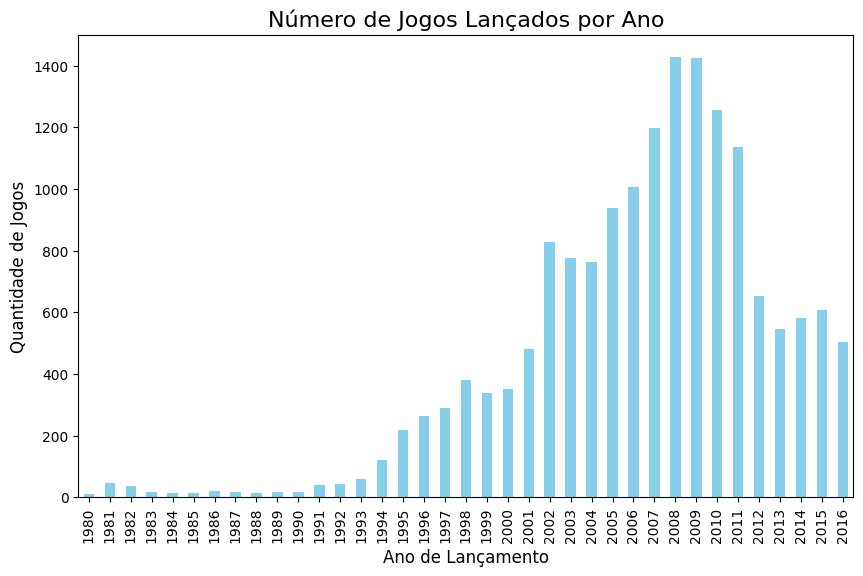

In [7]:
# Quantidade de jogos lançados por ano
games_releases_per_year = (
  df['year_of_release']
  .value_counts()
  .sort_index()
)

print(games_releases_per_year)

# Criar um gráfico de barras simples
plt.figure(figsize=(10, 6))
games_releases_per_year.plot(kind='bar', color='skyblue')

# Adicionar título e rótulos aos eixos
plt.title('Número de Jogos Lançados por Ano', fontsize=16)
plt.xlabel('Ano de Lançamento', fontsize=12)
plt.ylabel('Quantidade de Jogos', fontsize=12)

# Mostrar o gráfico
plt.show()

### Comentários
O período entre os anos de 2002 e 2011 foi especialmente importante, no que tange a quantidade de jogos lançados.

### Vendas totais por plataforma

In [8]:
# Veja como as vendas variaram de plataforma para plataforma. 

# Quantidade de vendas por plataforma 
total_sales_per_platform = (
  df.groupby('platform')['total_sales']
  .sum()
  .reset_index()
  .sort_values('total_sales', ascending = False)
)

total_sales_per_platform

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


### Comentários
As 5 plataformas com mais vendas foram PS2, X360, PS3, Wii, DS.

   platform  year_of_release  total_sales
0       PS2             2000        39.17
1       PS2             2001       166.43
2       PS2             2002       205.38
3       PS2             2003       184.31
4       PS2             2004       211.81
5       PS2             2005       160.66
6       PS2             2006       103.42
7       PS2             2007        75.99
8       PS2             2008        53.90
9       PS2             2009        26.40
10      PS2             2010         5.64
11      PS2             2011         0.45
12      PS3             2006        20.96
13      PS3             2007        73.19
14      PS3             2008       118.52
15      PS3             2009       130.93
16      PS3             2010       142.17
17      PS3             2011       156.78
18      PS3             2012       107.36
19      PS3             2013       113.25
20      PS3             2014        47.76
21      PS3             2015        16.82
22      PS3             2016      

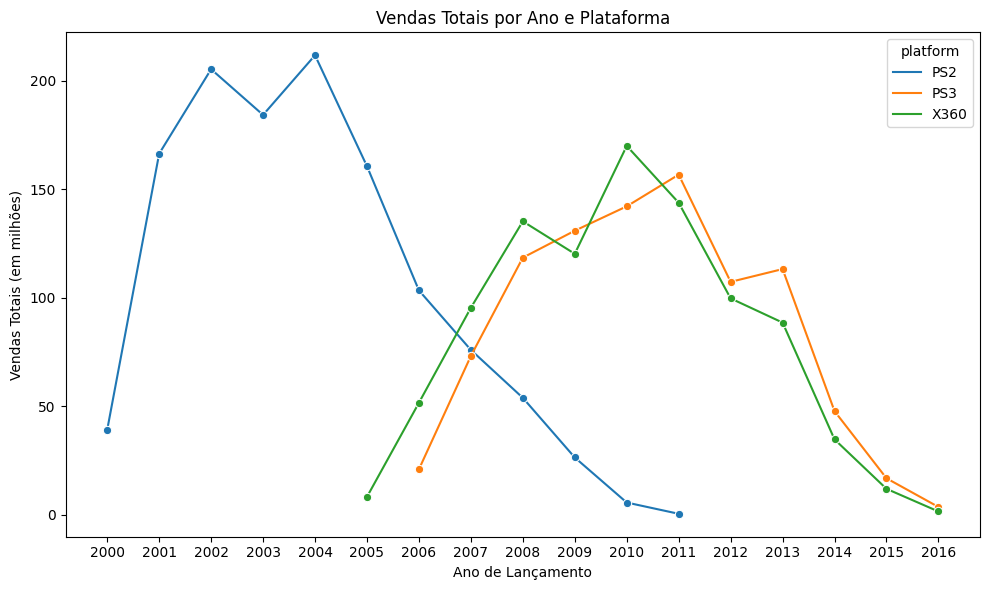

In [9]:
# Escolha as plataformas com as maiores vendas totais e construa uma distribuição com base em dados para cada ano.

# Criar um dataframe com os dados das 3 plataformas mais vendidas
top3_platforms = (
  df[df['platform'].isin(['PS2', 'X360', 'PS3'])]
  .groupby(['platform', 'year_of_release'])['total_sales']
  .sum()
  .reset_index()
)

print(top3_platforms)

# Criar um gráfico de linhas com os dados
plt.figure(figsize = (10, 6))
sns.lineplot(data = top3_platforms, x = 'year_of_release', y = 'total_sales', hue = 'platform', marker = 'o')

# Ajustar o título e os rótulos
plt.title('Vendas Totais por Ano e Plataforma')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Totais (em milhões)')
plt.xticks(top3_platforms['year_of_release'].unique())  # Ajusta os rótulos do eixo x para anos distintos

# Mostrar o gráfico
plt.tight_layout()
plt.show()

### Comentários
Considerando as plataformas 'PS2', 'X360', 'PS3', a plataforma PS2 é mais antiga e teve seu pico de vendas no ano 2004, enquanto X360 vendeu mais em 2010 e PS3 em 2011. 

### Plataformas populares antes de 2000 e após 2000
#### Solução 1

In [10]:
# Encontre as plataformas que costumavam ser populares, mas agora não têm vendas. 
# Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?

# 1.0 Criar DataFrame total_sales_by_year, que contém as vendas totais (total_sales) agrupadas por plataforma e ano de lançamento.
total_sales_by_year = (
  df
  .groupby(['platform', 'year_of_release'])
  .agg(
    total_sales = pd.NamedAgg(column = 'total_sales', aggfunc = 'sum')
  )
  .reset_index()
)

# 2.0 Criar DataFrame platform_by_year, que contém os anos de lançamento e final de cada plataforma.
platform_by_year = (
  df
  .groupby(['platform'])
  .agg(
    release_year = pd.NamedAgg(column = 'year_of_release', aggfunc = 'min'),
    finish_year = pd.NamedAgg(column = 'year_of_release', aggfunc = 'max'),
  )
  .reset_index()
) 

# 3.0 Criar coluna no dataframe platform_by_year que contem os anos de vida de cada plataforma
platform_by_year['lifespan'] = platform_by_year['finish_year'] - platform_by_year['release_year']

# 4.0 Unir os dois dataframes anteriores e criar uma coluna com os anos de vida de cada plataforma
merged_plat_sales_year = (
  total_sales_by_year
  .merge(
    platform_by_year,
    on = 'platform',
    how = 'left',
  ).drop_duplicates()
)

print(merged_plat_sales_year)


# 5.0 Criar dataframe para jogos populares antes de 2000
# Filtrar as plataformas cujo 'finish_year' seja menor ou igual a 2000
old_popular_platforms = (
  merged_plat_sales_year[merged_plat_sales_year['finish_year'] <= 2000]
)
 
# Agrupar por plataforma e somar as vendas totais, mantendo uma coluna adicional 
sales_old = (
  old_popular_platforms.groupby(['platform', 'lifespan', 'release_year'])['total_sales']
  .sum()
  .reset_index()
)

# Ordenar as plataformas pela soma das vendas totais
sales_old_sorted = sales_old.sort_values(by = 'total_sales', ascending=False)

# Exibir o resultado final
print(sales_old_sorted)


# 6.0 Criar dataframe para jogos populares após 2000
# Criar um dataframe com plataformas cujo ano de lançamento foi maior que 2000
new_popular_platforms = (
  merged_plat_sales_year[merged_plat_sales_year['finish_year'] > 2000]
)
 
# Agrupar por plataforma e somar as vendas totais, mantendo uma coluna adicional 
sales_new = (
  new_popular_platforms.groupby(['platform', 'release_year'])['total_sales']
  .sum()
  .reset_index()
)

# Ordenar as plataformas pela soma das vendas totais
sales_new_sorted = sales_new.sort_values(by = 'total_sales', ascending = False)

# Exibir o resultado final
print(sales_new_sorted)


    platform  year_of_release  total_sales  release_year  finish_year  \
0       2600             1980        11.38          1980         1989   
1       2600             1981        35.68          1980         1989   
2       2600             1982        28.88          1980         1989   
3       2600             1983         5.84          1980         1989   
4       2600             1984         0.27          1980         1989   
..       ...              ...          ...           ...          ...   
233       XB             2008         0.18          2000         2008   
234     XOne             2013        18.96          2013         2016   
235     XOne             2014        54.07          2013         2016   
236     XOne             2015        60.14          2013         2016   
237     XOne             2016        26.15          2013         2016   

     lifespan  
0           9  
1           9  
2           9  
3           9  
4           9  
..        ...  
233        

#### Comentários:
- Nesta solução, foi criado um dataframe com o total de vendas por plataforma e por ano, com colunas adicionais com informações sobre o ano de lançamento, o ano final de venda e a diferença entre eles (tempo de vida da plataforma).
- Para a análise, criei um dataframe cujos anos finais eram menores que 2000. Agrupei os dados por plataforma e somei as vendas. 
- A conclusão foi a de que as plataformas NES, SNES e 2600 foram as antigas que mais venderam. Elas tiveram cerca de 10 anos de vida. 
- Comparando as 3 plataformas mais populares de antes de 2000 com as 3 mais populares após o ano de 2000, existe um gap de cerca de 15 anos entre os lançamentos. 


#### Solução 2

    platform  year_of_release  total_sales
0       2600             1980        11.38
1       2600             1981        35.68
2       2600             1982        28.88
3       2600             1983         5.84
4       2600             1984         0.27
..       ...              ...          ...
233       XB             2008         0.18
234     XOne             2013        18.96
235     XOne             2014        54.07
236     XOne             2015        60.14
237     XOne             2016        26.15

[238 rows x 3 columns]


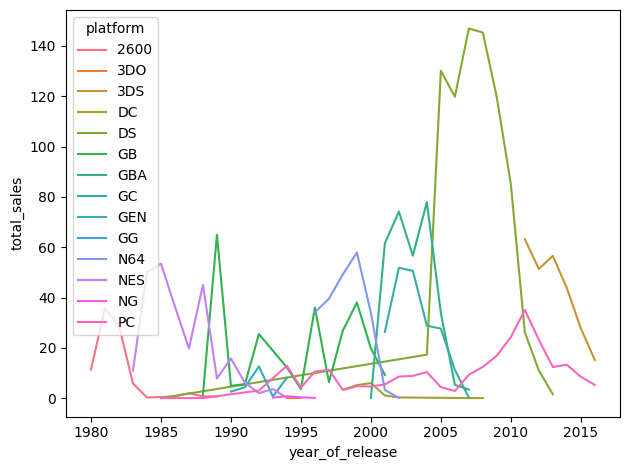

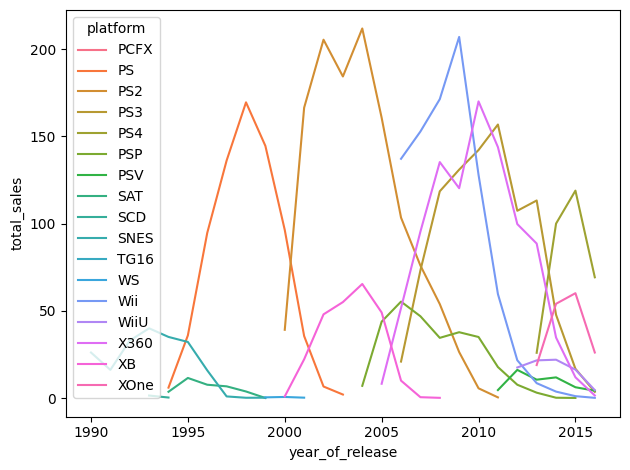

In [11]:
# Encontre as plataformas que costumavam ser populares, mas agora não têm vendas. 
# Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?

# Agrupar por plataforma e ano de lançamento
sales_by_platform_per_year = (
  df.groupby(['platform', 'year_of_release'])['total_sales']
  .sum()
  .reset_index()
)
print(sales_by_platform_per_year)

# Selecionar metade dos dados
first_half_data = sales_by_platform_per_year.iloc[:len(sales_by_platform_per_year) // 2]
second_half_data = sales_by_platform_per_year.iloc[len(sales_by_platform_per_year) // 2:]

# Plotar o primeiro gráfico (primeira metade dos dados)
sns.lineplot(x = first_half_data['year_of_release'], y = first_half_data['total_sales'], hue = first_half_data['platform'])
plt.tight_layout()
plt.show()

# Plotar o segundo gráfico (segunda metade dos dados)
sns.lineplot(x = second_half_data['year_of_release'], y = second_half_data['total_sales'], hue = second_half_data['platform'])
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>
    
Entendo o motivo para dividir os dados em dois DataFrames para facilitar a visualização. No entanto, para garantir uma comparação mais consistente, sugiro manter o eixo y igual para ambos os gráficos (por exemplo, o primeiro gráfico varia de 0 a 140, enquanto o segundo varia de 0 a 200). Para gráficos de linha que envolvem muitos dados, prefiro usar a biblioteca Plotly devido às suas capacidades interativas, que melhoram a visualização por meio da interatividade. Adicionei um código abaixo para sua referência (passe o mouse em cima de cada linha para visualizar os valores)

In [24]:
#Código gerado pela revisora 

import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Criar um conjunto de dados fictício
np.random.seed(0)  # Para reprodutibilidade
dates = pd.date_range(start='2023-01-01', periods=12, freq='M')  # Dados mensais por um ano
sales_data = np.random.randint(50, 300, size=(len(dates), 6))  # 6 produtos

# Criar a figura
fig = go.Figure()
product_names = [f'Produto {i+1}' for i in range(6)]  # Nomes dos produtos

# Adicionar linhas para cada produto
for i, product in enumerate(product_names):
    fig.add_trace(go.Scatter(
        x=dates, y=sales_data[:, i], mode='lines+markers', name=product,
        line=dict(dash='solid' if i % 2 == 0 else 'dash'),  # Estilo da linha alternado
        marker=dict(size=8),  # Tamanho dos marcadores
        hoverinfo='text', hovertext=f'{product}<br>Vendas: {sales_data[:, i]}'  # Informações ao passar o mouse
    ))

# Atualizar layout
fig.update_layout(title='Dados Mensais de Vendas para 6 Produtos', 
                  xaxis_title='Data', 
                  yaxis_title='Vendas')
fig.show()  # Mostrar a figura


#### Comentários: 
- Baseado em uma análise visual apenas, as plataformas NES, SNES e 2600 tiveram muitas vendas no anos anteriores, mas agora não são mais populares. 
- As plataformas mencionadas duraram cerca de 10 anos. 
- As plataformas PS2, X360, PS3 (populares após 2000), elas demoram cerca de 10 anos para aparecerem e desaparecem e a cada 5 anos uma nova plataforma é lançada.

### Determinação de um período para análise dos dados 
- Eu utilizei os dados do período de 2000 a 2015, pois engloba grandes plataformas, como PS2, PS3, WII, X360, mas também outras plataformas menos populares, além de estar relativamente próximo do ano de 2017, o que poderia pegar algum comportamento de consumo mais recente dos usuários.

<div class="alert alert-block alert-warning">

<b>Comentário: </b> <a class="tocSkip"></a>

Sugestão: É raro utilizar dados de mais de 2-3 anos para prever as vendas do próximo ano, mesmo em negócios tradicionais. Na indústria dinâmica de jogos de computador, evitar períodos mais longos é ainda mais importante, pois você pode acabar rastreando tendências obsoletas. No entanto, também não é aconselhável usar um período muito curto. **O ideal seria usar um intervalo de 2-3 anos, como 2014-2016, 2015-2016 ou 2013-2016.** 

</div>

In [13]:
# Criar um dataframe novo a partir do original com dados após 2000
filtered_df = df[df['year_of_release'] >= 2000].reset_index()
print(filtered_df)

       index                           name platform  year_of_release  \
0          0                     Wii Sports      Wii             2006   
1          2                 Mario Kart Wii      Wii             2008   
2          3              Wii Sports Resort      Wii             2009   
3          6          New Super Mario Bros.       DS             2006   
4          7                       Wii Play      Wii             2006   
...      ...                            ...      ...              ...   
14465  16710  Samurai Warriors: Sanada Maru      PS3             2016   
14466  16711               LMA Manager 2007     X360             2006   
14467  16712        Haitaka no Psychedelica      PSV             2016   
14468  16713               Spirits & Spells      GBA             2003   
14469  16714            Winning Post 8 2016      PSV             2016   

            genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
0          Sports     41.36     28.96      3.

### Plataformas líderes em vendas

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
XB       251.57
PC       205.72
GC       196.73
XOne     159.32
PS       140.70
WiiU      82.19
PSV       53.81
N64       37.30
GB        29.00
DC         7.41
WS         0.96
Name: total_sales, dtype: float64
   platform  year_of_release  total_sales
0       3DS             2011        63.20
1       3DS             2012        51.36
2       3DS             2013        56.57
3       3DS             2014        43.76
4       3DS             2015        27.78
..      ...              ...          ...
90       XB             2004        65.42
91       XB             2005        49.08
92       XB             2006        10.04
93       XB             2007         0.55
94       XB             2008         0.18

[95 rows x 3 columns]


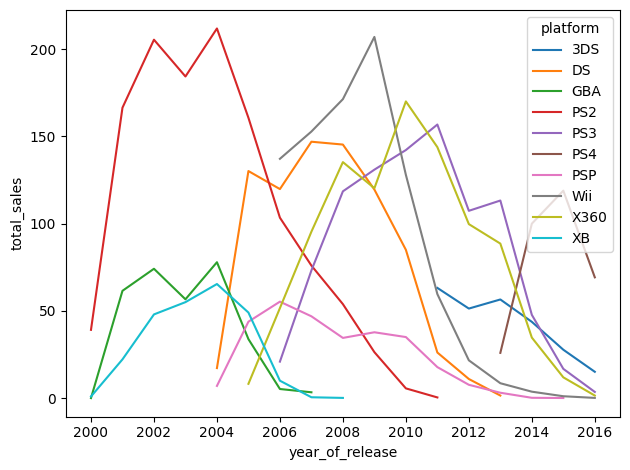

In [14]:
# Quais plataformas estão liderando em vendas? 
# Quais estão crescendo ou diminuindo? 
# Selecione várias plataformas potencialmente lucrativas.

# Agrupar o dataframe do item anterior por plataforma, somar o total de vendas e ordenar o resultado.
grouped_platforms = filtered_df.groupby('platform')['total_sales'].sum().sort_values(ascending = False)
print(grouped_platforms)

# Selecione plataformas potencialmente lucrativas.
potential_lucrative = (
 filtered_df[filtered_df['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS4', 'GBA', 'PSP', '3DS', 'XB'])]
 .groupby(['platform', 'year_of_release'])['total_sales']
 .sum()
 .reset_index()
)

print(potential_lucrative)

# Plotar gráficos
sns.lineplot(
    x = potential_lucrative['year_of_release'], 
    y = potential_lucrative['total_sales'], 
    hue = potential_lucrative['platform']
)
plt.tight_layout()
plt.show()

### Comentários:
- As plataformas que lideraram as vendas no período foram X360, PS3, Wii. Outras plataformas com vendas altas também foram selecionadas e suas curvas de vendas por ano estão mostradas no gráfico acima. 

### Vendas globais por plataforma

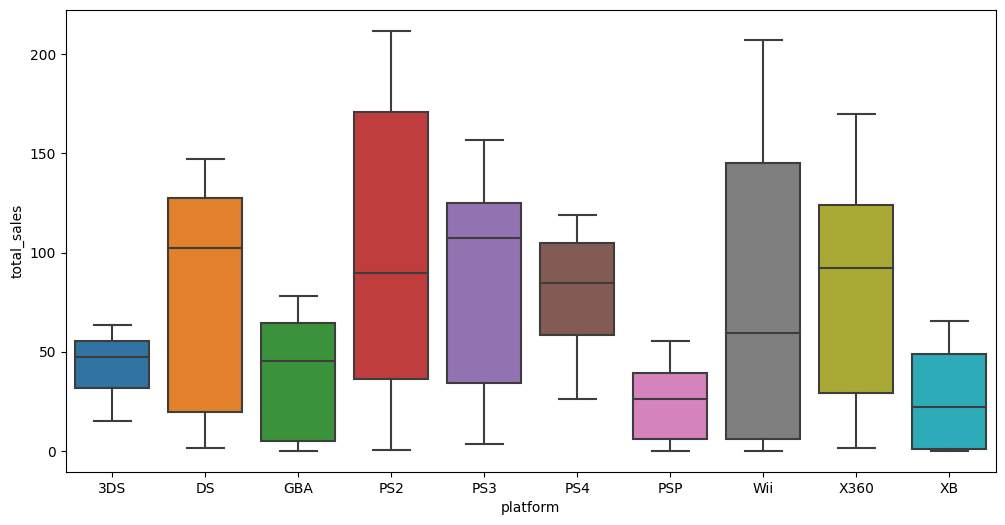

platform
PS2     102.796667
PS3      84.667273
Wii      81.016364
DS       80.276000
X360     80.103333
PS4      78.535000
3DS      42.968333
GBA      39.110000
XB       27.952222
PSP      24.127500
Name: total_sales, dtype: float64

In [15]:
# Construa um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma. 
# As diferenças nas vendas são significativas? 
# E quanto às vendas médias em várias plataformas? Descreva suas descobertas.

# 1.0 Construir um diagrama de caixa (boxplot) para as vendas globais por plataforma, considerando as 10 plataformas recentes potencialmente lucrativas
plt.figure(figsize=(12, 6))  # Ajustar o tamanho do gráfico
sns.boxplot(
 x = potential_lucrative['platform'],
 y = potential_lucrative['total_sales'],
 data = df
)
plt.show()

# 2.0 Média de vendas anuais por plataforma
mean_potential_lucrative = (
 potential_lucrative.groupby(['platform'])['total_sales']
 .mean()
 .sort_values(ascending = False)
)

mean_potential_lucrative

### Comentários
- Se compararmos os diagramas das 10 plataformas mais vendidas após 2000, fica claro que as vendas são discrepantes. 
- Um fato curioso é o de que, em termos de vendas totais, as mais populares são 'PS2', 'X360', 'PS3', 'Wii', 'DS'. Em termos de média de vendas anuais, a ordem é diferente.

### Avaliações de usuários e profissionais

                                          name platform  year_of_release  \
16                          Grand Theft Auto V      PS3             2013   
34                  Call of Duty: Black Ops II      PS3             2012   
37              Call of Duty: Modern Warfare 3      PS3             2011   
41                     Call of Duty: Black Ops      PS3             2010   
54                              Gran Turismo 5      PS3             2010   
...                                        ...      ...              ...   
16639  WSC REAL 09: World Snooker Championship      PS3             2009   
16674            Tsukigime Ranko's Longest Day      PS3             2014   
16676                         G1 Jockey 4 2008      PS3             2008   
16691             Dynasty Warriors: Eiketsuden      PS3             2016   
16710            Samurai Warriors: Sanada Maru      PS3             2016   

         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
16      Acti

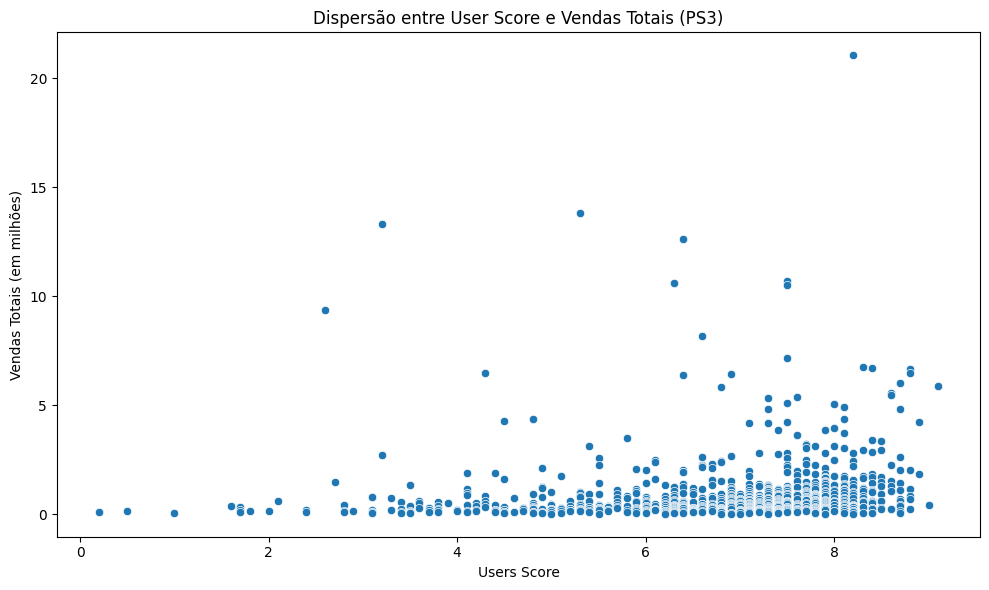

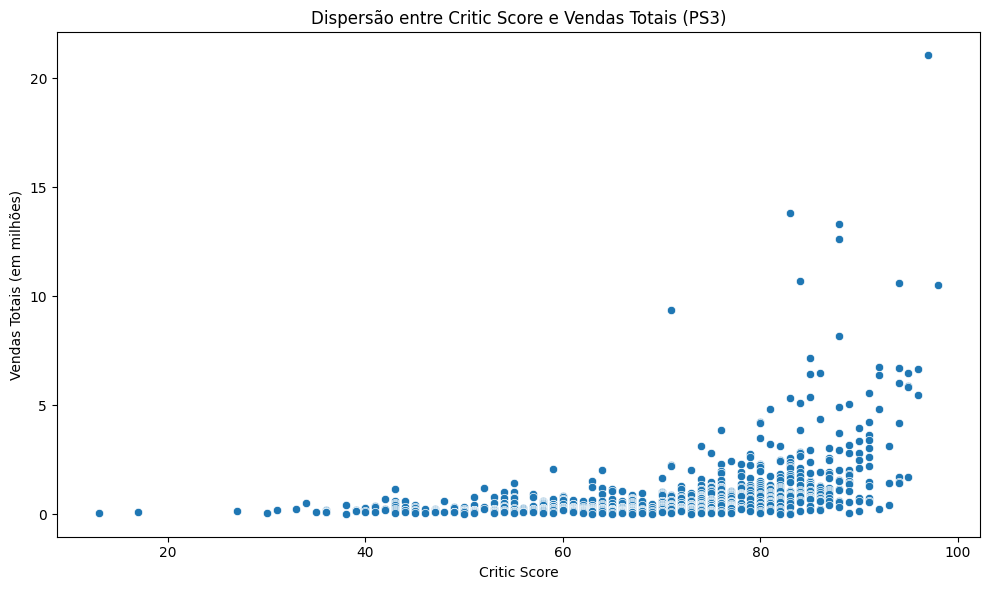

Correlação entre User Score e Vendas Totais: 0.13
Correlação entre Critic Score e Vendas Totais: 0.43


In [16]:
# Veja como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular (você escolhe). 
# Construa um gráfico de dispersão e calcule a correlação entre revisões e vendas. Tire conclusões.

# 1.0 Criar novo dataframe apenas com dados da plataforma PS3
df_PS3 = df[df['platform'] == 'PS3']
print(df_PS3)

# 2.0 Criar gráfico de dispersão para user-score e total_sales
# Criar gráfico
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x = 'user_score', y = 'total_sales', data = df_PS3)

# Ajustar o título e os rótulos
plt.title('Dispersão entre User Score e Vendas Totais (PS3)')
plt.xlabel('Users Score')
plt.ylabel('Vendas Totais (em milhões)')

# Mostrar o gráfico
plt.tight_layout()
plt.show()


# 3.0 Criar um gráfico de dispersão entre critic_score e total_sales
# Criar gráfico
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x = 'critic_score', y = 'total_sales', data = df_PS3)

# Ajustar o título e os rótulos
plt.title('Dispersão entre Critic Score e Vendas Totais (PS3)')
plt.xlabel('Critic Score')
plt.ylabel('Vendas Totais (em milhões)')

# Mostrar o gráfico
plt.tight_layout()
plt.show()


# 4.0 Calcular a correlação entre user_score e total_sales
correlation = df_PS3['user_score'].corr(df_PS3['total_sales'])
print(f'Correlação entre User Score e Vendas Totais: {correlation:.2f}')

# 5.0 Calcular a correlação entre critic_score e total_sales
correlation = df_PS3['critic_score'].corr(df_PS3['total_sales'])
print(f'Correlação entre Critic Score e Vendas Totais: {correlation:.2f}')

### Comentários:
- Não existe correlação entre a nota dos usuários e as vendas, e a correlação entre as avaliações profissionais é baixa. Ou seja, existe uma grande dispersão nessas variáveis. 

In [17]:
# Com essas conclusões em mente, compare as vendas em outras plataformas.

# 1.0 Criar novo dataframe apenas com dados da plataforma PS2
df_PS2 = df[df['platform'] == 'PS2']

# 2.0 Calcular a correlação entre critic_score e total_sales
correlation = df_PS2['critic_score'].corr(df_PS2['total_sales'])
print(f'Correlação entre Critic Score e Vendas Totais: {correlation:.2f}')

# 3.0 Calcular a correlação entre user_score e total_sales
correlation = df_PS2['user_score'].corr(df_PS2['total_sales'])
print(f'Correlação entre User Score e Vendas Totais: {correlation:.2f}')

# 4.0 Criar novo dataframe apenas com dados da plataforma X360
df_X360 = df[df['platform'] == 'X360']

# 5.0 Calcular a correlação entre critic_score e total_sales
correlation = df_X360['critic_score'].corr(df_X360['total_sales'])
print(f'Correlação entre Critic Score e Vendas Totais: {correlation:.2f}')

# 6.0 Calcular a correlação entre user_score e total_sales
correlation = df_X360['user_score'].corr(df_X360['total_sales'])
print(f'Correlação entre User Score e Vendas Totais: {correlation:.2f}')

Correlação entre Critic Score e Vendas Totais: 0.39
Correlação entre User Score e Vendas Totais: 0.18
Correlação entre Critic Score e Vendas Totais: 0.39
Correlação entre User Score e Vendas Totais: 0.11


### Comentários
- As correlações de outras plataformas importantes foram ainda mais baixas que a escolhida anteriormente.
- As tendencias gerais foram as mesmas. 

### Análise em relação aos gêneros dos jogos 

In [18]:
# Dê uma olhada na distribuição geral de jogos por gênero. 
# O que podemos dizer sobre os gêneros mais lucrativos? 
# Você pode generalizar sobre gêneros com vendas altas e baixas?

# Contar quantidade de jogos por genero
games_per_genre = (
  df['genre']
  .value_counts()
  .reset_index()
)

# Renomear as colunas para futuro merge
games_per_genre.columns = ['genre', 'games_count']

# Criar um dataframe filtrado por genero
sales_per_genre = (
  df
  .groupby(['genre'])
  .agg(
    total_sales = pd.NamedAgg(column = 'total_sales', aggfunc = 'sum')
  )
  .reset_index()
  .sort_values(by = 'total_sales', ascending = False)
)

# Juntar os dois dataframes
merged_genre_df = (
  sales_per_genre
  .merge(
    games_per_genre,
    on = 'genre',
    how = 'left'
  )
)

(merged_genre_df)


,genre,total_sales,games_count
0,Action,1716.52,3307
1,Sports,1309.67,2306
2,Shooter,1041.36,1296
3,Role-Playing,931.08,1481
4,Platform,825.55,878
5,Misc,790.29,1721
6,Racing,723.49,1226
7,Fighting,442.66,837
8,Simulation,387.96,857
9,Puzzle,239.89,569


### Comentários
- Os dois gêneros mais lucrativos, action e sports, possuem a maior quantidade de jogos. Para os demais gêneros esta relação não é direta.

### Análise por região

In [19]:
# Para cada região (AN, UE, JP), determine: As cinco plataformas principais. 

# 1.0 América do Norte
na_sales_per_platform = (
  df.groupby('platform')['na_sales']
  .sum()
  .reset_index()
)
top5_platforms_na = (
  na_sales_per_platform
  .nlargest(5, 'na_sales')
  .reset_index(drop = True)
)
print('As 5 principais plataformas da América do Norte, em termos de vendas são:')
print(top5_platforms_na)

# Europa
eu_sales_per_platform = (
  df.groupby('platform')['eu_sales']
  .sum()
  .reset_index()
)
top5_platforms_eu = (
  eu_sales_per_platform
  .nlargest(5, 'eu_sales')
  .reset_index(drop = True)
)
print('As 5 principais plataformas da Europa, em termos de vendas são:')
print(top5_platforms_eu)

# Japão
jp_sales_per_platform = (
  df.groupby('platform')['jp_sales']
  .sum()
  .reset_index()
)
top5_platforms_jp = (
  jp_sales_per_platform
  .nlargest(5, 'jp_sales')
  .reset_index(drop = True)
)
print('As 5 principais plataformas do Japão, em termos de vendas são:')
print(top5_platforms_jp)

As 5 principais plataformas da América do Norte, em termos de vendas são:
  platform  na_sales
0     X360    595.74
1      PS2    572.92
2      Wii    486.87
3      PS3    390.13
4       DS    380.31
As 5 principais plataformas da Europa, em termos de vendas são:
  platform  eu_sales
0      PS2    332.63
1      PS3    327.21
2     X360    268.32
3      Wii    258.32
4       PS    212.39
As 5 principais plataformas do Japão, em termos de vendas são:
  platform  jp_sales
0       DS    175.02
1       PS    139.78
2      PS2    137.54
3     SNES    116.55
4      3DS    100.62


<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>
    
Você pode otimizar o código eliminando a repetição usando uma função. Isso tornará o código mais conciso e reutilizável. Aqui está uma versão otimizada:

```python
def top_platforms_by_region(df, sales_column, region_name):
    """
    Função para determinar as 5 principais plataformas de vendas em uma região específica.
    
    Args:
        df: DataFrame contendo os dados de vendas.
        sales_column: Nome da coluna de vendas para a região.
        region_name: Nome da região para o título da saída.
        
    Returns:
        DataFrame das 5 principais plataformas.
    """
    sales_per_platform = (
        df.groupby('platform')[sales_column]
        .sum()
        .reset_index()
    )
    top5_platforms = (
        sales_per_platform
        .nlargest(5, sales_column)
        .reset_index(drop=True)
    )
    print(f'As 5 principais plataformas da {region_name}, em termos de vendas são:')
    print(top5_platforms)
    return top5_platforms

# Chamar a função para cada região
top_platforms_by_region(df, 'na_sales', 'América do Norte')
top_platforms_by_region(df, 'eu_sales', 'Europa')
top_platforms_by_region(df, 'jp_sales', 'Japão')
```

### Comentários 
Em termos gerais, as quantidades de vendas das 5 maiores plataformas na América do Norte são quase o dobro das quantidades de vendas das 5 maiores plataformas na Europa, que são quase o dobro de vendas das 5 maiores plataformas do Japão.

In [20]:
# Para cada região (AN, UE, JP), determine: Os cinco principais gêneros. Explique a diferença.

# América do Norte
na_sales_per_genre = (
  df
  .groupby('genre')['na_sales']
  .sum()
  .reset_index()
)
top5_genres_na = (
  na_sales_per_genre
  .nlargest(5, 'na_sales')
  .reset_index(drop = True)
)
print('Os 5 principais gêneros da América do Norte, em termos de vendas são:')
print(top5_genres_na)

# Europe
eu_sales_per_genre = (
  df
  .groupby('genre')['eu_sales']
  .sum()
  .reset_index()
)
top5_genres_eu = (
  eu_sales_per_genre
  .nlargest(5, 'eu_sales')
  .reset_index(drop = True)
)
print('Os 5 principais gêneros da Europa, em termos de vendas são:')
print(top5_genres_eu)

# Japão
jp_sales_per_genre = (
  df
  .groupby('genre')['jp_sales']
  .sum()
  .reset_index()
)
top5_genres_jp = (
  jp_sales_per_genre
  .nlargest(5, 'jp_sales')
  .reset_index(drop = True)
)
print('Os 5 principais gêneros do Japão, em termos de vendas são:')
print(top5_genres_jp)

Os 5 principais gêneros da América do Norte, em termos de vendas são:
      genre  na_sales
0    Action    863.17
1    Sports    671.20
2   Shooter    584.83
3  Platform    444.44
4      Misc    399.57
Os 5 principais gêneros da Europa, em termos de vendas são:
     genre  eu_sales
0   Action    510.99
1   Sports    371.33
2  Shooter    314.52
3   Racing    234.49
4     Misc    210.60
Os 5 principais gêneros do Japão, em termos de vendas são:
          genre  jp_sales
0  Role-Playing    353.39
1        Action    160.14
2        Sports    134.93
3      Platform    130.71
4          Misc    107.02


### Comentários
- Os 5 principais gêneros da América do Norte e da Europa são parecidos. Apenas a quarta posição é diferente. Enquanto na América do Norte, games do gênero Platform ocupam tal posição, na Europa, Racing ocupa a quarta posição. 
- Em todas as três regiões, os gênero Action, Sports e Misc são populares, sendo que o último ocupa a quinta posição em todas as regiões.
- O gênero Platform ocupa a quarta posição na AN e no JP.

In [21]:
# As classificações do ESRB afetam as vendas em regiões individuais?

# América do Norte
na_sales_per_rating = (
  df
  .groupby('rating')['na_sales']
  .sum()
  .reset_index()
)
top5_rating_na = (
  na_sales_per_rating
  .nlargest(10, 'na_sales')
  .reset_index(drop = True)
)
print('Os 5 principais gêneros da América do Norte, em termos de vendas são:')
print(top5_rating_na)

# Europa
eu_sales_per_rating = (
  df
  .groupby('rating')['eu_sales']
  .sum()
  .reset_index()
)
top5_rating_eu = (
  eu_sales_per_rating
  .nlargest(10, 'eu_sales')
  .reset_index(drop = True)
)
print('Os 5 principais gêneros da Europa, em termos de vendas são:')
print(top5_rating_eu)

# Japão
jp_sales_per_rating = (
  df
  .groupby('rating')['jp_sales']
  .sum()
  .reset_index()
)
top5_rating_jp = (
  jp_sales_per_rating
  .nlargest(10, 'jp_sales')
  .reset_index(drop = True)
)
print('Os 5 principais gêneros do Japão, em termos de vendas são:')
print(top5_rating_jp)

Os 5 principais gêneros da América do Norte, em termos de vendas são:
  rating  na_sales
0      E   1274.24
1      T    747.60
2      M    742.89
3   E10+    345.50
4    K-A      2.56
5     EC      1.53
6     AO      1.26
7     RP      0.00
Os 5 principais gêneros da Europa, em termos de vendas são:
  rating  eu_sales
0      E    703.87
1      M    480.00
2      T    421.79
3   E10+    183.35
4     AO      0.61
5    K-A      0.27
6     EC      0.11
7     RP      0.03
Os 5 principais gêneros do Japão, em termos de vendas são:
  rating  jp_sales
0      E    197.96
1      T    150.70
2      M     63.58
3   E10+     40.20
4    K-A      1.46
5     AO      0.00
6     EC      0.00
7     RP      0.00


### Comentários
- Sim, as classificações afetam as vendas por região. As 4 primeiras posições em termos de venda possuem as mesmas classificações em todas as 3 regiões. As demais 4 posições, que totalizam um percentual muito baixo do total de vendas em todas as regiões, possuem classificações diferentes por região. 

## Teste de hipóteses

### As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

In [22]:
# A Hipótese nula (H0) será considerada: "As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas." 
# A Hipótese alternativa será considerada: "As classificações médias dos usuários das plataformas Xbox One e PC são diferentes."
# O limiar alfa será considerado 0,05

#Filtrar os dados por plataforma e remover NaNs
xone_scores = df[df['platform'] == "XOne"]['user_score'].dropna()
pc_scores = df[df['platform'] == "PC"]['user_score'].dropna()

# Calcular as médias e as variâncias (para referência)
xone_mean_user_score = xone_scores.mean()
xone_var_user_score = xone_scores.var()

pc_mean_user_score = pc_scores.mean()
pc_var_user_score = pc_scores.var()

print(f'Para os usuários de Xbox One, a Média das classificações é {xone_mean_user_score} e a Variância é {xone_var_user_score}')
print(f'Para os usuários de PC, a Média das classificações é {pc_mean_user_score} e a Variância é {pc_var_user_score}')

# Significância estatística crítica (limiar)
alpha = 0.05

# Teste t de Student para duas amostras independentes. Usar equal_var=False para variâncias desiguais
results_1 = st.ttest_ind(xone_scores, pc_scores, equal_var = False)

# imprimindo o valor-p resultante
print('Valor-p: ', results_1.pvalue)

# comparando o valor-p com o limiar
if results_1.pvalue < alpha:
    print("Rejeitamos a hipótese nula: As classificações médias dos usuários das plataformas Xbox One e PC são diferentes.")
else:
    print("Não podemos rejeitar a hipótese nula: As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.")

Para os usuários de Xbox One, a Média das classificações é 6.521428571428572 e a Variância é 1.9069968429360695
Para os usuários de PC, a Média das classificações é 7.065960264900661 e a Variância é 2.349224375076853
Valor-p:  4.5385802963771835e-06
Rejeitamos a hipótese nula: As classificações médias dos usuários das plataformas Xbox One e PC são diferentes.


### As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

In [23]:
# A Hipótese nula (H0) será considerada: "As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são iguais." 
# A Hipótese alternativa será considerada: "As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes."
# O limiar alfa será considerado 0,05

#Filtrar os dados por gênero e remover NaNs
action_scores = df[df['genre'] == "Action"]['user_score'].dropna()
sports_scores = df[df['genre'] == "Sports"]['user_score'].dropna()

# Calcular as médias e as variâncias (para referência)
action_mean_user_score = action_scores.mean()
action_var_user_score = action_scores.var()

sports_mean_user_score = sports_scores.mean()
sports_var_user_score = sports_scores.var()

print(f'Para o gênero Ação, a Média das classificações é {action_mean_user_score} e a Variância é {action_var_user_score}')
print(f'Para o gênero Esportes, a Média das classificações é {sports_mean_user_score} e a Variância é {sports_var_user_score}')

# Significância estatística crítica (limiar)
alpha = 0.05

# Teste t de Student para duas amostras independentes. Usar equal_var=False para variâncias desiguais
results_2 = st.ttest_ind(action_scores, sports_scores, equal_var = False)

# imprimindo o valor-p resultante
print('Valor-p: ', results_2.pvalue)

# comparando o valor-p com o limiar
if results_2.pvalue < alpha:
    print("Rejeitamos a hipótese nula: As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.")
else:
    print("Não podemos rejeitar a hipótese nula: As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são as mesmas.")

Para o gênero Ação, a Média das classificações é 7.058129175946549 e a Variância é 2.027493768262496
Para o gênero Esportes, a Média das classificações é 6.951433857539316 e a Variância é 2.623055812519272
Valor-p:  0.07370217419278526
Não podemos rejeitar a hipótese nula: As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são as mesmas.


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>
    
- Os testes foram realizados corretamente: 
    - Bom trabalho na análise de variância e média antes de realizar o teste
    - Boa interpretação dos resultados
    
Parabéns!

### Explique: a) Como você formula as hipóteses alternativas e nulas; b) Quais critérios você usou para testar as hipóteses, e por quê.
- a) Eu formulo a hipótese nula supondo que não há efeito ou diferença entre as condições de estudo. A hipótese alternativa é aquela em que há um efeito ou diferença.
- b) Para testar as hipóteses, foi utilizado o teste t de Student para amostras independentes. Este teste é apropriado quando queremos comparar as médias de dois grupos e temos dados contínuos que podem seguir uma distribuição normal.
- c) Equal Variance: foi utilizado equal_var = False, que é apropriado quando as variâncias dos grupos podem ser diferentes (assumindo que os dados não seguem uma distribuição normal).
- d) Nível de Significância (alpha): a probabilidade de rejeitar a hipótese nula quando ela é verdadeira. O valor  significa que aceita-se uma chance de 5% de cometer um erro do Tipo I (rejeitar a hipótese nula quando ela é verdadeira).
- e) Valor-p: O valor-p é a probabilidade de observar os dados coletados (ou algo mais extremo) sob a suposição de que a hipótese nula é verdadeira. Se o valor-p obtido do teste for menor que o nível de significância, rejeitamos a hipótese nula. Caso contrário, não temos evidências suficientes para rejeitá-la.

# Revisor, eu gostaria de sugestões para tornar meu código mais enxuto e eficiente. Obrigada =)

<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>
    
Oi, Aline! Fico feliz que você tem interesse de sempre otimizar o código. Isso é uma ótima qualidade de profissional de dados!

Seu código já está bem otimizado! Gostei que o seu código é documentado e também apresenta boa redibilidade. Adicionei apenas alguns comentários no seu projeto apenas como alguns pontos de melhoria.


Caso você queira uma leitura sobre python avançado, gosto bastante desse artigo: https://www.softformance.com/blog/how-to-speed-up-python-code/ 